In [58]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set()

In [59]:
# Givens

k_arr = [1, 2, 3, 4, 5]
w_arr = [0, 1, 2, 1, 0]
u_allowable = [0, 1, 2]
h_allowable = [8, 7, 6, 5, 4, 3]
hf_allowable = [8, 7, 6]
N = len(k_arr)

In [60]:
surf_x = []
surf_y = []
u_surf_z = []
J_surf_z = []
line_y = []

for k in reversed(range(N)):  # Iterate from time k=4 to k=0
    benefits = {}  # Initialize dict for storing benefits between iterations
    w = w_arr[k]
    J_max_k = -np.inf
    for h in h_allowable:
        J_max = -np.inf  # Initialize max benefit to smallest possible value
        for u in u_allowable:
            h_next = h + w - u  # Calculate next state
            if k == 4:  # First iteration
                if h_next in hf_allowable:  # If next state is in [6, 7, 8]
                    J = 0.1 * h * u - 0.5 * (h_next - 8) ** 2  # Calculate benefit
                    if J > J_max:  # If J is maximized for current state
                        u_optimal = u
                        J_max = J
                        benefits.update({h: J_max})  # Store benefits for next iteration

                        # Save data for plotting
                        surf_x.append(k)
                        surf_y.append(h)
                        u_surf_z.append(u)
                        J_surf_z.append(J_max)
                    if J > J_max_k:
                        J_max_k = J
            else:  # Not first iteration
                if h_next in h_allowable:  # If next state is in [3, 4, 5, 6, 7, 8]
                    if h_next in benefits_next:
                        J = 0.1 * h * u + benefits_next[h_next]  # Calculate benefit
                        if J > J_max:  # If J is maximized for current state
                            u_optimal = u
                            J_max = J
                            benefits.update({h: J_max})  # Store benefits for next iteration

                            # Save data for plotting
                            surf_x.append(k)
                            surf_y.append(h)
                            u_surf_z.append(u)
                            J_surf_z.append(J_max)
                    if J > J_max_k:
                        J_max_k = J
    line_y.append(J_max_k)
    benefits_next = benefits  # Store benefits as next state benefits for next iteration

Text(0.5, 0.92, 'Optimal Control Surface Plot')

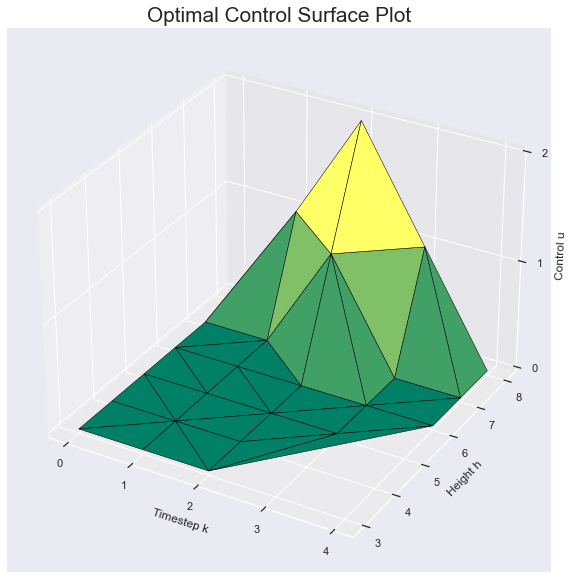

In [61]:
# Make optimal control surface plot

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

surf = ax.plot_trisurf(surf_x, surf_y, u_surf_z, linewidth=0.5, cmap="summer", edgecolor="black")

# Set axis ticks to integer only
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))

# Set axis labels
ax.set_xlabel("Timestep k")
ax.set_ylabel("Height h")
ax.set_zlabel("Control u")

ax.set_title("Optimal Control Surface Plot", fontsize='xx-large')

Text(0.5, 0.92, 'Benefit Surface Plot')

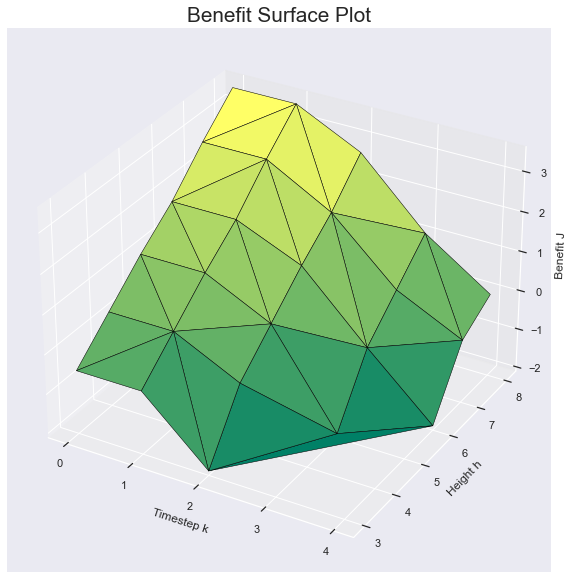

In [62]:
# Make benefit surface plot

fig = plt.figure(figsize=(10,10))
ax = plt.axes(projection='3d')

surf = ax.plot_trisurf(surf_x, surf_y, J_surf_z, linewidth=0.5, cmap="summer", edgecolor="black")

# Set axis ticks to integer only
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))
ax.zaxis.set_major_locator(MaxNLocator(integer=True))

# Set axis labels
ax.set_xlabel("Timestep k")
ax.set_ylabel("Height h")
ax.set_zlabel("Benefit J")

ax.set_title("Benefit Surface Plot", fontsize='xx-large')

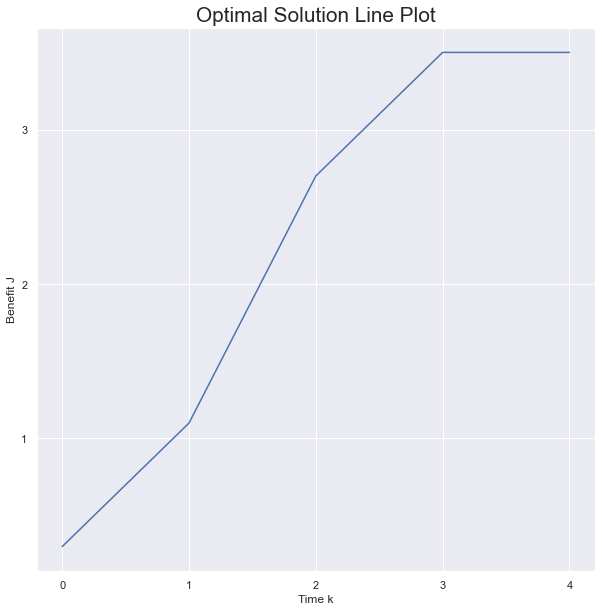

In [64]:
line_x = [0, 1, 2, 3, 4]
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(111)

line = ax.plot(line_x, line_y)

ax.set_title("Optimal Solution Line Plot", fontsize="xx-large")
ax.set_xlabel("Time k")
ax.set_ylabel("Benefit J")

# Set axis ticks to integer only
ax.xaxis.set_major_locator(MaxNLocator(integer=True))
ax.yaxis.set_major_locator(MaxNLocator(integer=True))